<a href="https://colab.research.google.com/github/lokeshreddiee/Task_Completion/blob/main/CMPE_255_GROUP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Hazard Prediction

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [151]:
from sklearn.preprocessing import OneHotEncoder

In [152]:
from sklearn.metrics import balanced_accuracy_score

In [153]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

Reading the data from credit risk dataset

In [154]:
credit_base = pd.read_csv('credit_risk_dataset.csv')

In [155]:
credit_base.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [156]:
credit_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Exploratory data analysis

# Univariate analysis of continuous variables

In [157]:
measures_df = credit_base.select_dtypes(include='number')

In [158]:
measures_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [159]:
measures_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [160]:
columns = list(measures_df.columns)
columns.remove('loan_status')
columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

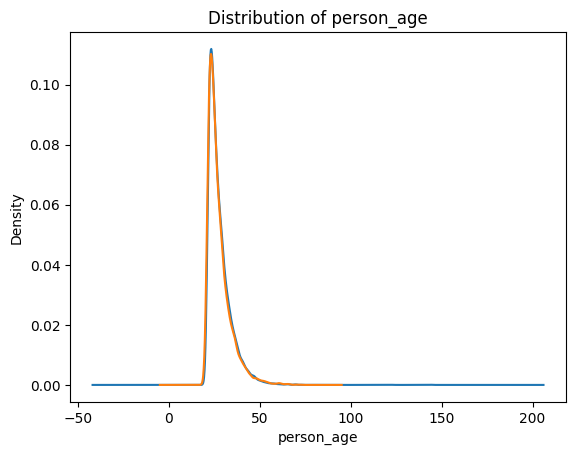

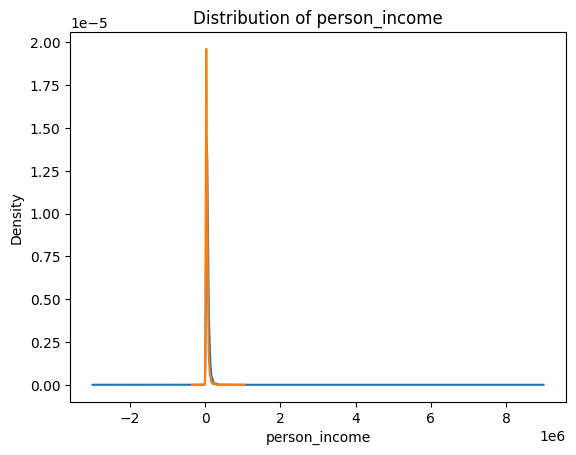

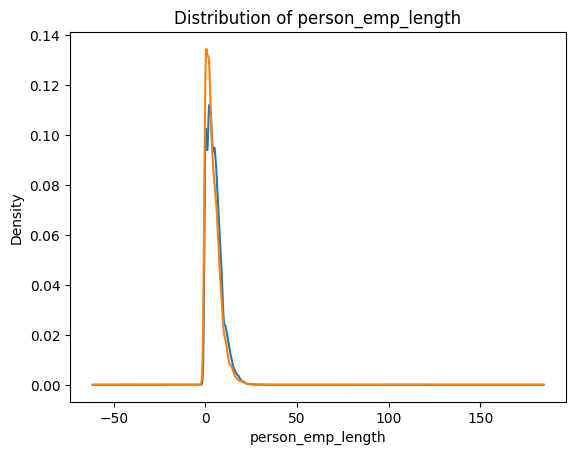

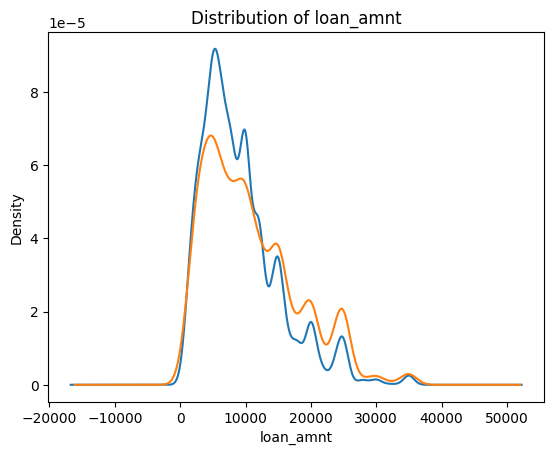

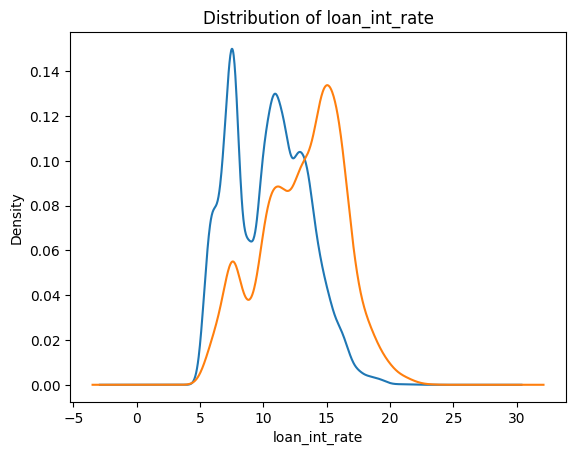

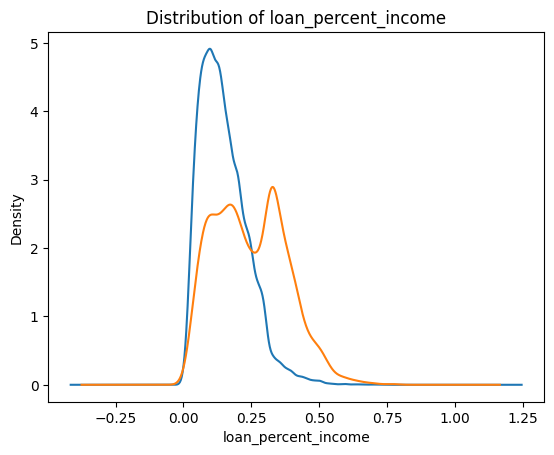

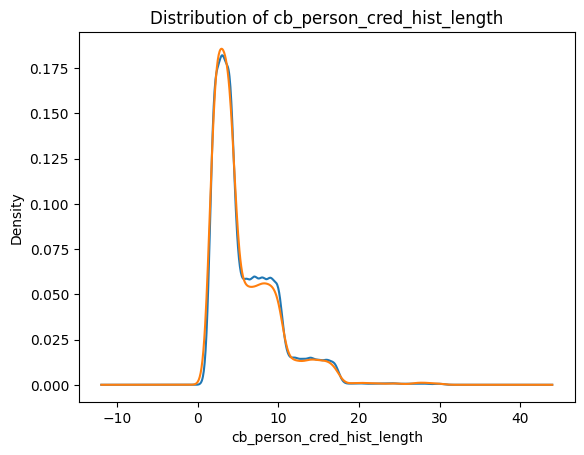

In [161]:
grpby = credit_base.groupby('loan_status')
for col in columns:
    plt.figure()
    grpby[col].plot(kind='kde')
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))

# Numerical features based bivariate analysis

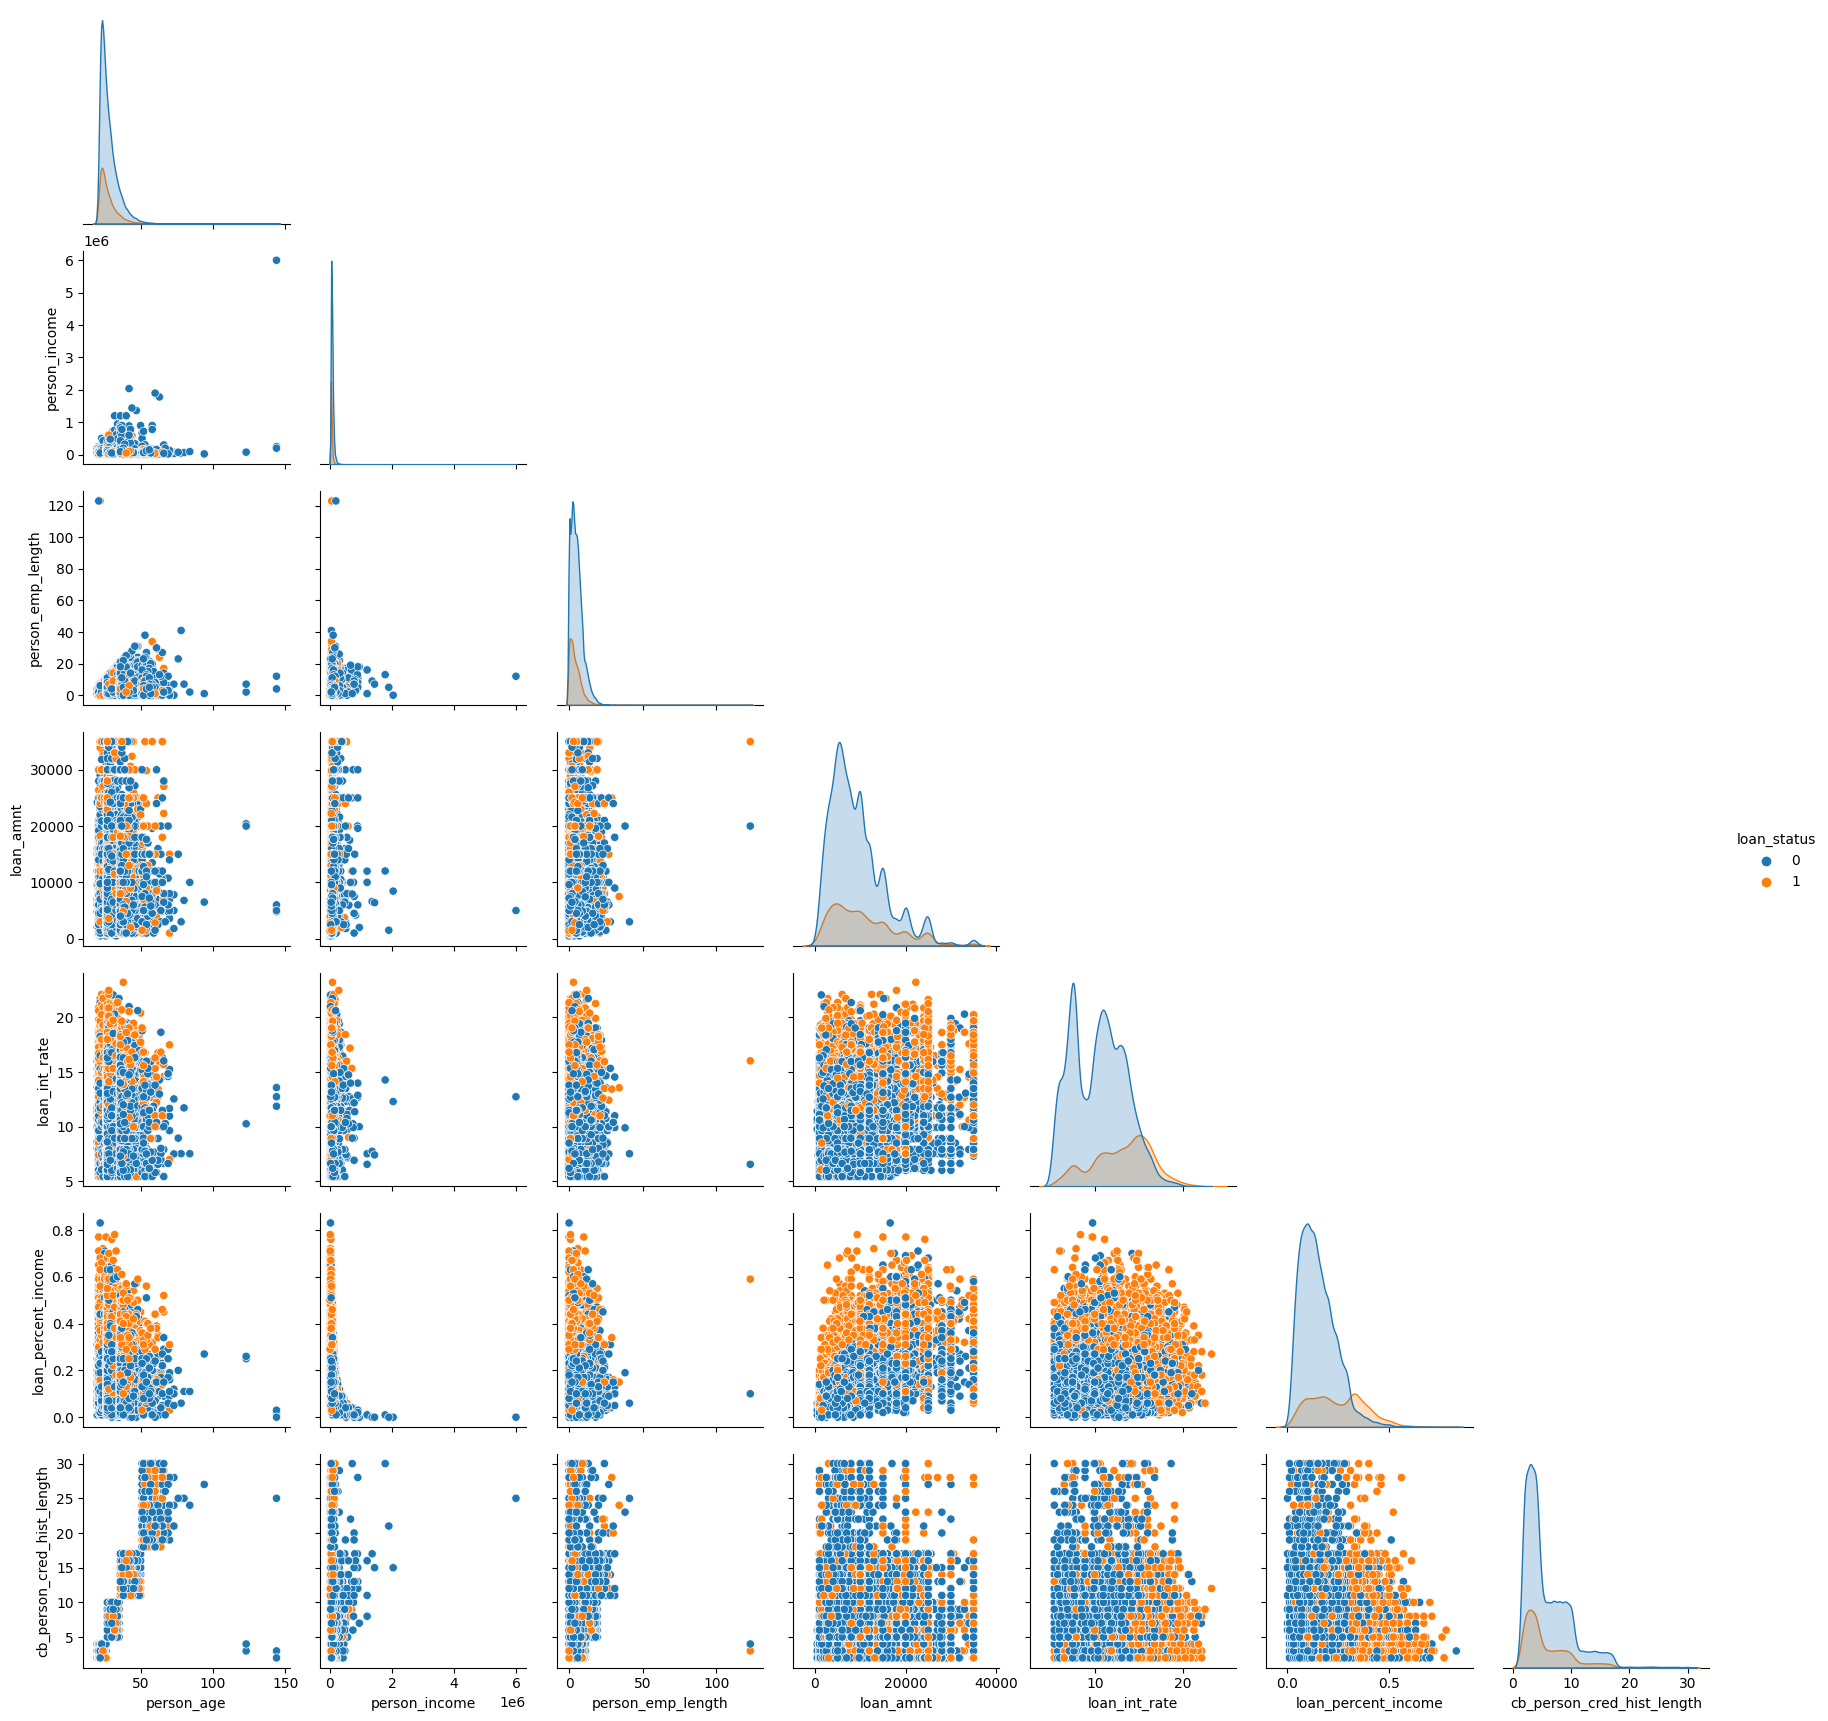

In [162]:
sns.pairplot(measures_df, hue = 'loan_status', corner = True)

<Axes: title={'center': 'person_age'}, xlabel='loan_status'>

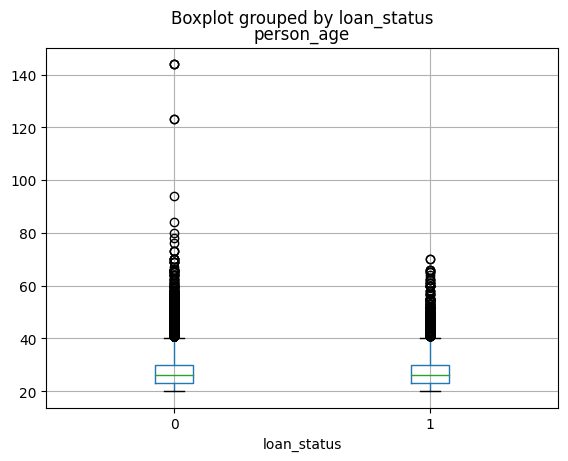

In [163]:
measures_df.boxplot(column=['person_age'],by='loan_status')

In [164]:
credit_base['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [165]:
credit_base['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [166]:
credit_base['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [167]:
credit_base['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

<Axes: xlabel='person_age', ylabel='cb_person_default_on_file'>

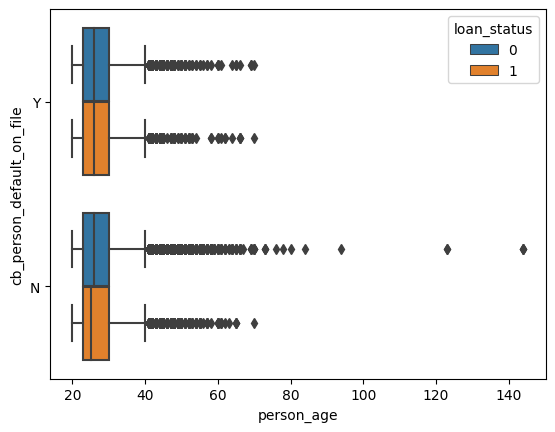

In [168]:
sns.boxplot(data=credit_base, x="person_age", y="cb_person_default_on_file", hue="loan_status")

#PREPROCESSING

##dropping null valued rows

In [169]:
credit_base.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [170]:
credit_base = credit_base.dropna()

In [171]:
credit_base.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


##outliers

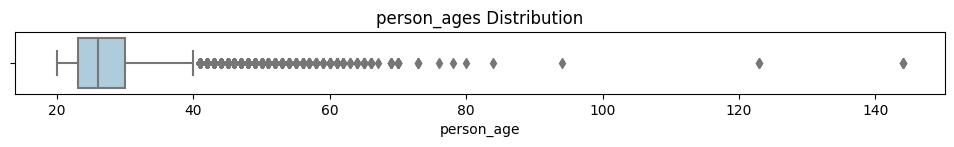

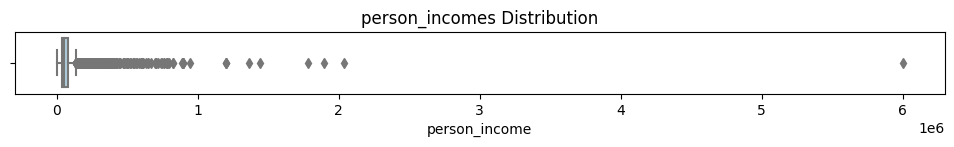

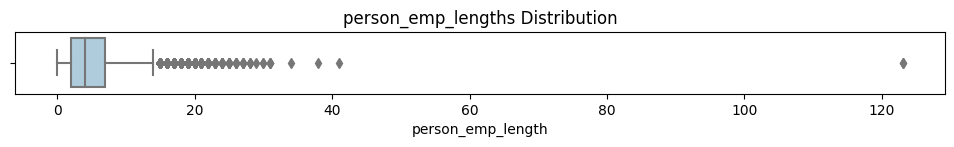

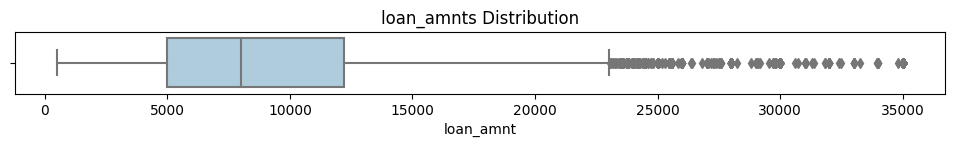

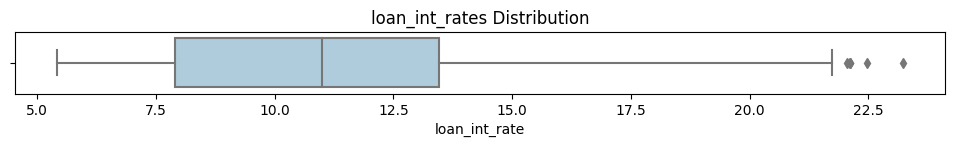

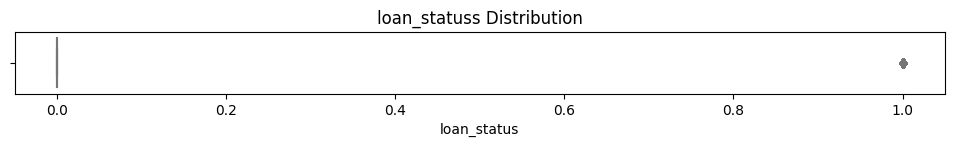

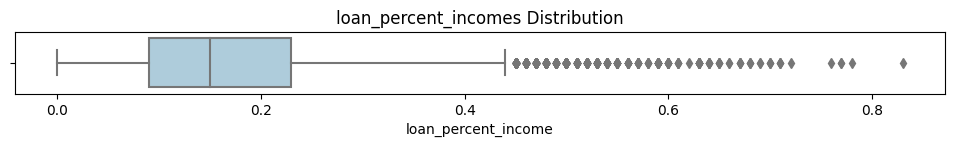

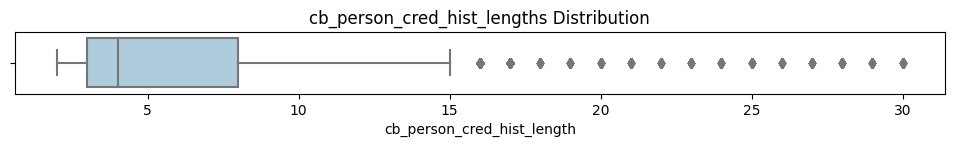

In [172]:
for column in measures_df:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=measures_df, x=column,palette="Paired")
        plt.title(f'{column}''s Distribution')  

In [173]:
for i in measures_df.columns:
    print ('# of rows beyond range of 3 standard deviations in ', i)
    print(len(measures_df[(measures_df[i] > measures_df[i].mean() + 3*measures_df[i].std()) | (measures_df[i] < measures_df[i].mean() - 3*measures_df[i].std())]))

# of rows beyond range of 3 standard deviations in  person_age
558
# of rows beyond range of 3 standard deviations in  person_income
233
# of rows beyond range of 3 standard deviations in  person_emp_length
321
# of rows beyond range of 3 standard deviations in  loan_amnt
337
# of rows beyond range of 3 standard deviations in  loan_int_rate
38
# of rows beyond range of 3 standard deviations in  loan_status
0
# of rows beyond range of 3 standard deviations in  loan_percent_income
336
# of rows beyond range of 3 standard deviations in  cb_person_cred_hist_length
284


In [174]:
credit_base.shape

(28638, 12)

In [175]:
for col in columns:
  credit_base = credit_base[(credit_base[col] <= credit_base[col].mean() + 3*credit_base[col].std()) &
        (credit_base[col] >= credit_base[col].mean() - 3*credit_base[col].std())]

In [176]:
credit_base.shape

(26620, 12)

##encoding

In [177]:
credit_base.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [178]:
credit_base['cb_person_default_on_file'] = credit_base['cb_person_default_on_file'].astype('category')
credit_base['loan_grade'] = credit_base['loan_grade'].astype('category')
credit_base['loan_intent'] = credit_base['loan_intent'].astype('category')
credit_base['person_home_ownership'] = credit_base['person_home_ownership'].astype('category')

In [179]:
credit_base['cb_person_default_on_file_new'] = credit_base['cb_person_default_on_file'].cat.codes
credit_base['loan_grade_new'] = credit_base['loan_grade'].cat.codes
credit_base['loan_intent_new'] = credit_base['loan_intent'].cat.codes
credit_base['person_home_ownership_new'] = credit_base['person_home_ownership'].cat.codes

In [180]:
credit_base['loan_intent_new'].head()

1     1
5     5
9     5
11    2
19    1
Name: loan_intent_new, dtype: int8

In [181]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(credit_base[['cb_person_default_on_file_new','loan_grade_new', 'loan_intent_new', 'person_home_ownership_new']]).toarray(), index=np.array(credit_base.index))

In [182]:
np.array(credit_base.index)

array([    1,     5,     9, ..., 32293, 32295, 32296])

In [183]:
enc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [184]:
New_df=credit_base.join(enc_data)

In [185]:
New_df.columns

Index([                   'person_age',                 'person_income',
               'person_home_ownership',             'person_emp_length',
                         'loan_intent',                    'loan_grade',
                           'loan_amnt',                 'loan_int_rate',
                         'loan_status',           'loan_percent_income',
           'cb_person_default_on_file',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,            

In [186]:
New_df = New_df.drop(columns=['cb_person_default_on_file', 'loan_grade', 'loan_intent', 'person_home_ownership'])

In [187]:
New_df.columns

Index([                   'person_age',                 'person_income',
                   'person_emp_length',                     'loan_amnt',
                       'loan_int_rate',                   'loan_status',
                 'loan_percent_income',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,                              11,
                                    12,                              13,
                                    14,            

In [188]:
New_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_new,loan_grade_new,...,9,10,11,12,13,14,15,16,17,18
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,21,10000,2.0,4500,8.63,1,0.45,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,24,10800,8.0,1750,10.99,1,0.16,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# stripping target values

In [189]:
features = New_df.drop('loan_status', 1)
target = New_df['loan_status']

In [190]:
features.shape

(26620, 30)

In [191]:
target.head()

1     0
5     1
9     1
11    1
19    1
Name: loan_status, dtype: int64

In [192]:
del New_df

# train test split

In [193]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# standarising data

In [194]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.values)
x_test = scaler.transform(x_test.values)

# feature extraction

In [195]:
Estimator = RandomForestClassifier(n_estimators=10) 
#using random forest as the estimator for recursive feature extractor
FeatureExtractor = RFE(estimator=Estimator, n_features_to_select=20)
fitter = FeatureExtractor.fit(x_train, y_train)
extracted_features = features.columns[(fitter.get_support())]

In [196]:
extracted_features

Index([                'person_age',              'person_income',
                'person_emp_length',                  'loan_amnt',
                    'loan_int_rate',        'loan_percent_income',
       'cb_person_cred_hist_length',             'loan_grade_new',
                  'loan_intent_new',  'person_home_ownership_new',
                                  2,                            4,
                                  5,                            9,
                                 10,                           11,
                                 12,                           15,
                                 17,                           18],
      dtype='object')

In [197]:
fitter.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True])

In [198]:
featureSelectedTrain = [row[fitter.get_support()] for row in x_train]
featureSelectedTest = [row[fitter.get_support()] for row in x_test]

# class imbalance

In [199]:
credit_base['loan_status'].value_counts()

0    21039
1     5581
Name: loan_status, dtype: int64

# upsampling

In [200]:
upsampler = SMOTE(random_state = 5)
x_train_ures_SMOTE, y_train_ures_SMOTE = upsampler.fit_resample(x_train, y_train.ravel())

In [201]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))

Before OverSampling, the shape of train_X: (21296, 30)
Before OverSampling, the shape of train_y: (21296,) 

After OverSampling, the shape of train_X: (33616, 30)
After OverSampling, the shape of train_y: (33616,) 

Counts of label '0' - Before Oversampling:16808, After OverSampling: 16808
Counts of label '1' - Before Oversampling:4488, After OverSampling: 16808


# downsampling

In [202]:
downsampler = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
x_train_dres, y_train_dres = downsampler.fit_resample(x_train, y_train)

In [203]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))

Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (17413, 30)
After UnderSampling, the shape of train_y: (17413,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 12925
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


In [204]:
x_train_dres, y_train_dres = downsampler.fit_resample(x_train_dres, y_train_dres)

In [205]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))


Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (14791, 30)
After UnderSampling, the shape of train_y: (14791,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 10303
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


#PCA

#no resampling

In [206]:
PCanalysis = PCA()
x_train_pca = PCanalysis.fit_transform(x_train)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16462406 0.26836134 0.34306381 0.41053816 0.47319864 0.52278867
 0.56543052 0.60662328 0.64751193 0.68777819 0.72613252 0.76313788
 0.79892112 0.83280874 0.86645296 0.90002942 0.93300633 0.96153991
 0.98969758 0.99483158 0.99769644 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [207]:
PCanalysis = PCA(19)
X_train_pca = PCanalysis.fit_transform(x_train)
X_test_transformed_pca = PCanalysis.transform(x_test)

In [208]:
X_train_pca.shape

(21296, 19)

In [209]:
PCanalysis = PCA()
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.17064    0.26371695 0.33450876 0.39935496 0.46100754 0.51648392
 0.56924548 0.62118359 0.67060887 0.71142932 0.74964969 0.78569214
 0.81983226 0.85378188 0.88736093 0.91718359 0.94534726 0.96960543
 0.99153197 0.99554266 0.99814181 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [210]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.17064    0.26371695 0.33450876 0.39935496 0.46100754 0.51648392
 0.56924548 0.62118359 0.67060887 0.71142932 0.74964969 0.78569214
 0.81983226 0.85378188 0.88736093 0.91718359 0.94534726 0.96960543
 0.99153197]


In [211]:
PCanalysis = PCA(18)
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [212]:
X_train_upsampled_pca.shape

(33616, 18)

In [213]:
X_train_upsampled_pca[:,0].shape

(33616,)

[Text(0.5, 1.0, ' data PCA projection')]

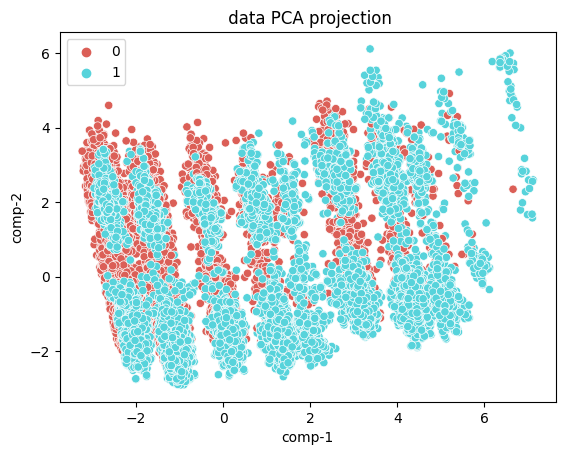

In [214]:
df1 = pd.DataFrame()
df1["y"] = y_train_ures_SMOTE
df1["comp-1"] = X_train_upsampled_pca[:,0]
df1["comp-2"] = X_train_upsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df1).set(title=" data PCA projection") 

#downsample

In [215]:
PCanalysis = PCA()
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597 0.9942807  0.99761155 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [216]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597]


In [217]:
PCanalysis = PCA(n_components=18)
x_train_downsampled_pca = PCanalysis.fit_transform(x_train_dres)
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)


In [218]:
x_train_downsampled_pca.shape

(14791, 18)

[Text(0.5, 1.0, ' data PCA projection')]

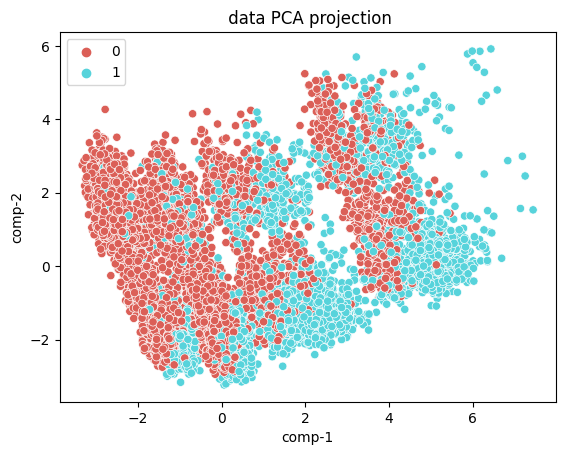

In [219]:
df = pd.DataFrame()
df["y"] = y_train_dres
df["comp-1"] = x_train_downsampled_pca[:,0]
df["comp-2"] = x_train_downsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" data PCA projection") 

#Models

In [220]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [221]:
def scores(y_test, y_prediction):
  print('Analysis of the Algorithm:\n')
  print(confusion_matrix(y_test, y_prediction))
  print(confusion_matrix(y_test, y_prediction))
  print(classification_report(y_test, y_prediction))
  print('Accuracy:',accuracy_score(y_test, y_prediction))
  print('Precision:',precision_score(y_test, y_prediction, average='weighted'))
  print('Recall:',recall_score(y_test, y_prediction, average='weighted'))
  print('F1 Score:',f1_score(y_test, y_prediction, average='weighted'))

In [222]:
def roc(y_test, y_prediction):
  falsePositiveRate = dict()
  truePositiveRate = dict()
  threshold = dict()

  for i in range(6):    
      falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction, pos_label=i)

  plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
  plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')

  plt.title('Multiclass ROC curve for LR')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC curve for LR ',dpi=300)

In [223]:
# summarize results
def results(grid_result):
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [224]:
resultDic={}

#LR Model with GridsearchCV

In [225]:
def LR(x_train, y_train):
  model = LogisticRegression()
  solver=['saga']
  penalty = ['l2', 'l1']
  c_values = [100, 10, 1.0, 0.1, 0.01]
  
  # define grid search
  grid = dict(solver=solver,penalty=penalty,C=c_values)
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(recall_score, average='weighted'), error_score=0)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [226]:
LRresult={}

##Logistic Regression without resampling

In [227]:
grid_result = LR(x_train, y_train)

In [228]:
results(grid_result)

Best: 0.868426 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.867957 (0.001690) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002488) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [229]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR1'])

Analysis of the Algorithm:

[[4015  216]
 [ 495  598]]
[[4015  216]
 [ 495  598]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.73      0.55      0.63      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8664537941397445
Precision: 0.8582996906809005
Recall: 0.8664537941397445
F1 Score: 0.8588159828706913
testing recall Score for class1: 0.5471180237877402


In [230]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5479055258467023


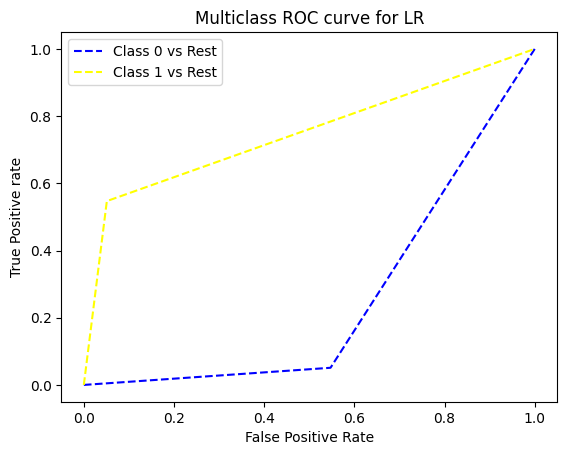

In [231]:
roc(y_test, y_prediction)

##Logistic Regression without resampling and pca

In [232]:
grid_result = LR(x_train_pca, y_train)

In [233]:
results(grid_result)

Best: 0.868426 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001521) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868426 (0.001758) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.865562 (0.001774) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [234]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", LRresult['LR2'])

Analysis of the Algorithm:

[[3707  524]
 [ 789  304]]
[[3707  524]
 [ 789  304]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4231
           1       0.37      0.28      0.32      1093

    accuracy                           0.75      5324
   macro avg       0.60      0.58      0.58      5324
weighted avg       0.73      0.75      0.74      5324

Accuracy: 0.7533809166040571
Precision: 0.7306159573269803
Recall: 0.7533809166040571
F1 Score: 0.7401148503638109
Class 1 recall score on test data: 0.27813357731015553


In [235]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5452317290552585


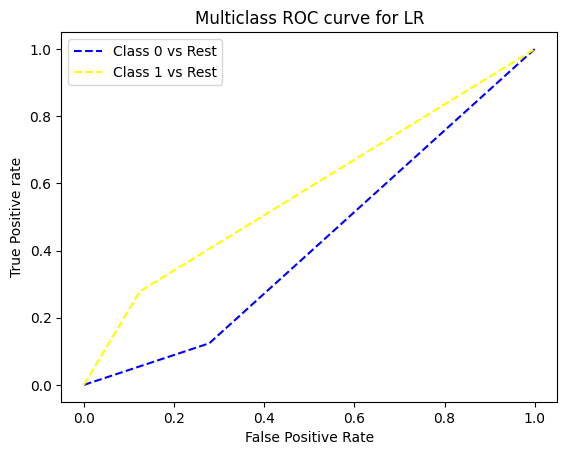

In [236]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling

In [237]:
grid_result = LR(x_train_dres, y_train_dres)

In [238]:
results(grid_result)

Best: 0.880941 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.880671 (0.002720) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880536 (0.002674) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.880468 (0.003108) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.880941 (0.003113) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880671 (0.003576) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.878981 (0.003391) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [239]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',LRresult['LR3'])

Analysis of the Algorithm:

[[3603  628]
 [ 293  800]]
[[3603  628]
 [ 293  800]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      4231
           1       0.56      0.73      0.63      1093

    accuracy                           0.83      5324
   macro avg       0.74      0.79      0.76      5324
weighted avg       0.85      0.83      0.83      5324

Accuracy: 0.8270097670924117
Precision: 0.8499495006519464
Recall: 0.8270097670924117
F1 Score: 0.8349381822430395
testing recall Score: 0.7319304666056725


In [240]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7355169340463458


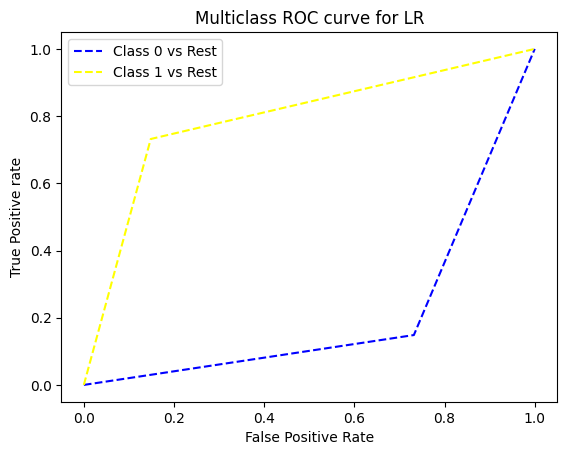

In [241]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling and pca

In [242]:
grid_result = LR(x_train_downsampled_pca, y_train_dres)

In [243]:
results(grid_result)

Best: 0.880198 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003403) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003403) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.880130 (0.003403) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.880062 (0.003474) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.880198 (0.003475) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003395) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.879860 (0.003320) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.879724 (0.002797) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880062 (0.002598) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.875262 (0.003002) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [244]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',LRresult['LR4'])

Analysis of the Algorithm:

[[3587  644]
 [ 285  808]]
[[3587  644]
 [ 285  808]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4231
           1       0.56      0.74      0.63      1093

    accuracy                           0.83      5324
   macro avg       0.74      0.79      0.76      5324
weighted avg       0.85      0.83      0.83      5324

Accuracy: 0.8255071374906086
Precision: 0.8504510831713763
Recall: 0.8255071374906086
F1 Score: 0.8339487815640269
testing class 1 recall Score: 0.7392497712717292


In [245]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.7375222816399287


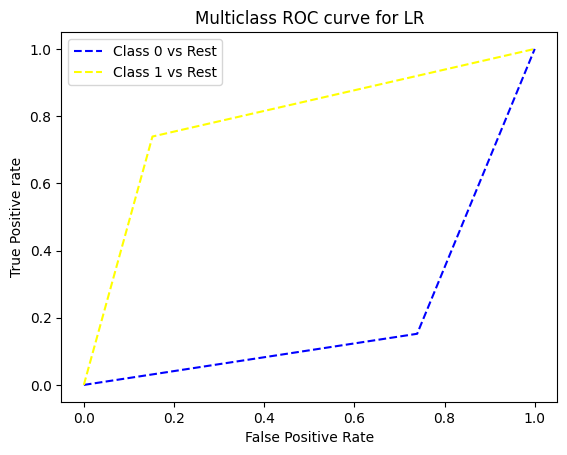

In [246]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling

In [247]:
grid_result = LR(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [248]:
results(grid_result)

Best: 0.803546 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802445 (0.002455) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.802445 (0.002455) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.802475 (0.002465) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.802475 (0.002497) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.802475 (0.002418) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.802534 (0.002503) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.802415 (0.002411) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.802743 (0.002429) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.803546 (0.002678) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802713 (0.002042) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [249]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR5'])

Analysis of the Algorithm:

[[3441  790]
 [ 256  837]]
[[3441  790]
 [ 256  837]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4231
           1       0.51      0.77      0.62      1093

    accuracy                           0.80      5324
   macro avg       0.72      0.79      0.74      5324
weighted avg       0.85      0.80      0.82      5324

Accuracy: 0.8035311795642374
Precision: 0.845287382224053
Recall: 0.8035311795642374
F1 Score: 0.8162002085314433
Class 1 recall score for test data: 0.7657822506861848


In [250]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7852213231794384


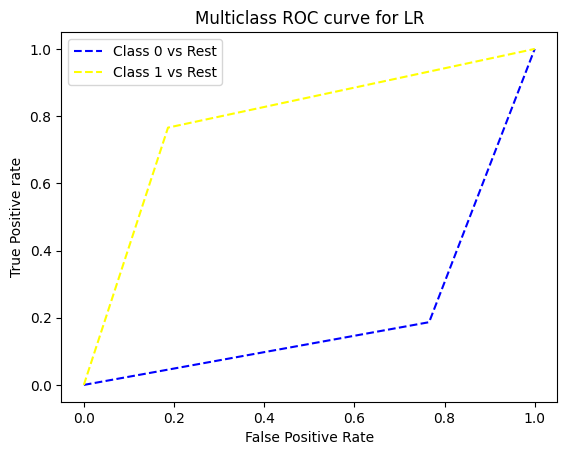

In [251]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling and pca

In [252]:
grid_result = LR(X_train_upsampled_pca, y_train_ures_SMOTE)

In [253]:
results(grid_result)

Best: 0.788702 using {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004116) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.787928 (0.004138) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.787839 (0.004132) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.787958 (0.004209) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.787988 (0.003944) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.788702 (0.004333) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [254]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR6'])

Analysis of the Algorithm:

[[3363  868]
 [ 253  840]]
[[3363  868]
 [ 253  840]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4231
           1       0.49      0.77      0.60      1093

    accuracy                           0.79      5324
   macro avg       0.71      0.78      0.73      5324
weighted avg       0.84      0.79      0.80      5324

Accuracy: 0.7894440270473329
Precision: 0.840066001671411
Recall: 0.7894440270473329
F1 Score: 0.8043082828519552
Class 1 recall score for test data: 0.7685269899359561


In [255]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7793907663017611


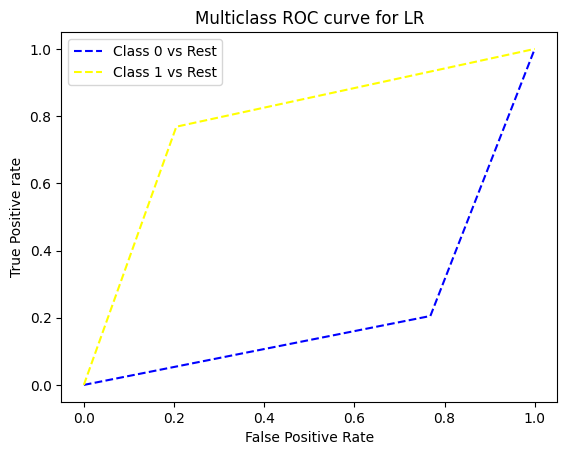

In [256]:
roc(y_test, y_prediction)

##Logistic Regression with select features

In [257]:
grid_result = LR(featureSelectedTrain, y_train)

In [258]:
results(grid_result)

Best: 0.869318 using {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868520 (0.001189) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868520 (0.001189) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868473 (0.001255) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868426 (0.001389) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868285 (0.001242) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.000938) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.869318 (0.001293) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.869224 (0.001377) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866783 (0.001755) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002111) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [259]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
LRresult['LR7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR7'])

Analysis of the Algorithm:

[[4017  214]
 [ 493  600]]
[[4017  214]
 [ 493  600]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.74      0.55      0.63      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8672051089406462
Precision: 0.8591565236317029
Recall: 0.8672051089406462
F1 Score: 0.8596102670739503
testing recall Score for class1: 0.5489478499542544


In [260]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5472370766488414


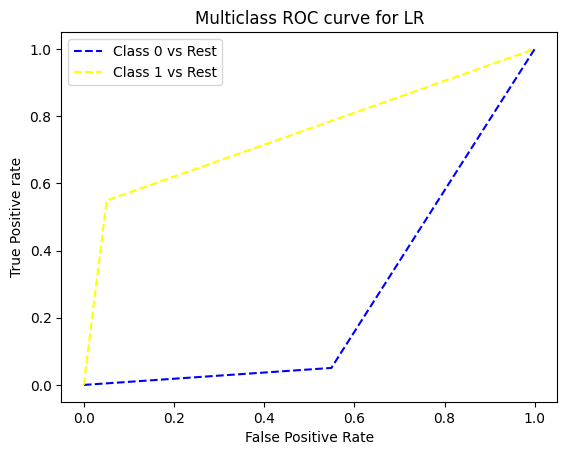

In [261]:
roc(y_test, y_prediction)

##Logistic Regression comparision

In [262]:
LRresult

{'LR1': 0.5471180237877402,
 'LR2': 0.27813357731015553,
 'LR3': 0.7319304666056725,
 'LR4': 0.7392497712717292,
 'LR5': 0.7657822506861848,
 'LR6': 0.7685269899359561,
 'LR7': 0.5489478499542544}

Logistic Regression with neighborhood cleaning rule undersampling and PCA gave better Recall score for Class 1 

In [263]:
resultDic['LogisticRegression']=0.7685269899359561#LR6

#Decision Tree with gridsearchCV

In [291]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="entropy")
  max_depth = [3, 4, 5, 6, 7, 8, 9]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [292]:
DTresult={}

##Decision Tree without resampling

In [293]:
grid_result = DT(x_train, y_train)

In [294]:
results(grid_result)

Best: 0.927310 using {'max_depth': 9, 'min_samples_split': 10}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 4}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 10}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 20}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 4}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 10}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 20}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 4}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 10}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 20}
0.923929 (0.005480) with: {'max_depth': 6, 'min_samples_split': 4}
0.923929 (0.005480) with: {'max_depth': 6, 'min_samples_split': 10}
0.923835 (0.005606) with: {'max_depth': 6, 'min_samples_split': 20}
0.924821 (0.004547) with: {'max_depth': 7, 'min_samples_split': 4}
0.924868 (0.004595) with: {'max_depth': 7, 'min_samples_sp

In [295]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT1'])

Analysis of the Algorithm:

[[4203   28]
 [ 327  766]]
[[4203   28]
 [ 327  766]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4231
           1       0.96      0.70      0.81      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.93      0.93      5324

Accuracy: 0.933320811419985
Precision: 0.9353943206431395
Recall: 0.933320811419985
F1 Score: 0.9291758981633123
testing recall Score for class1: 0.7008234217749314


In [296]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.7043226381461676


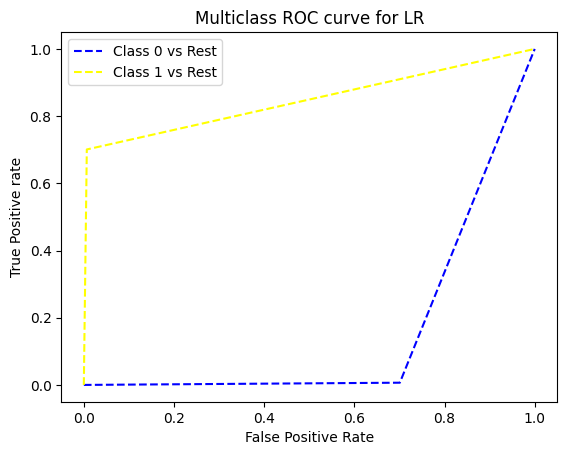

In [297]:
roc(y_test, y_prediction)

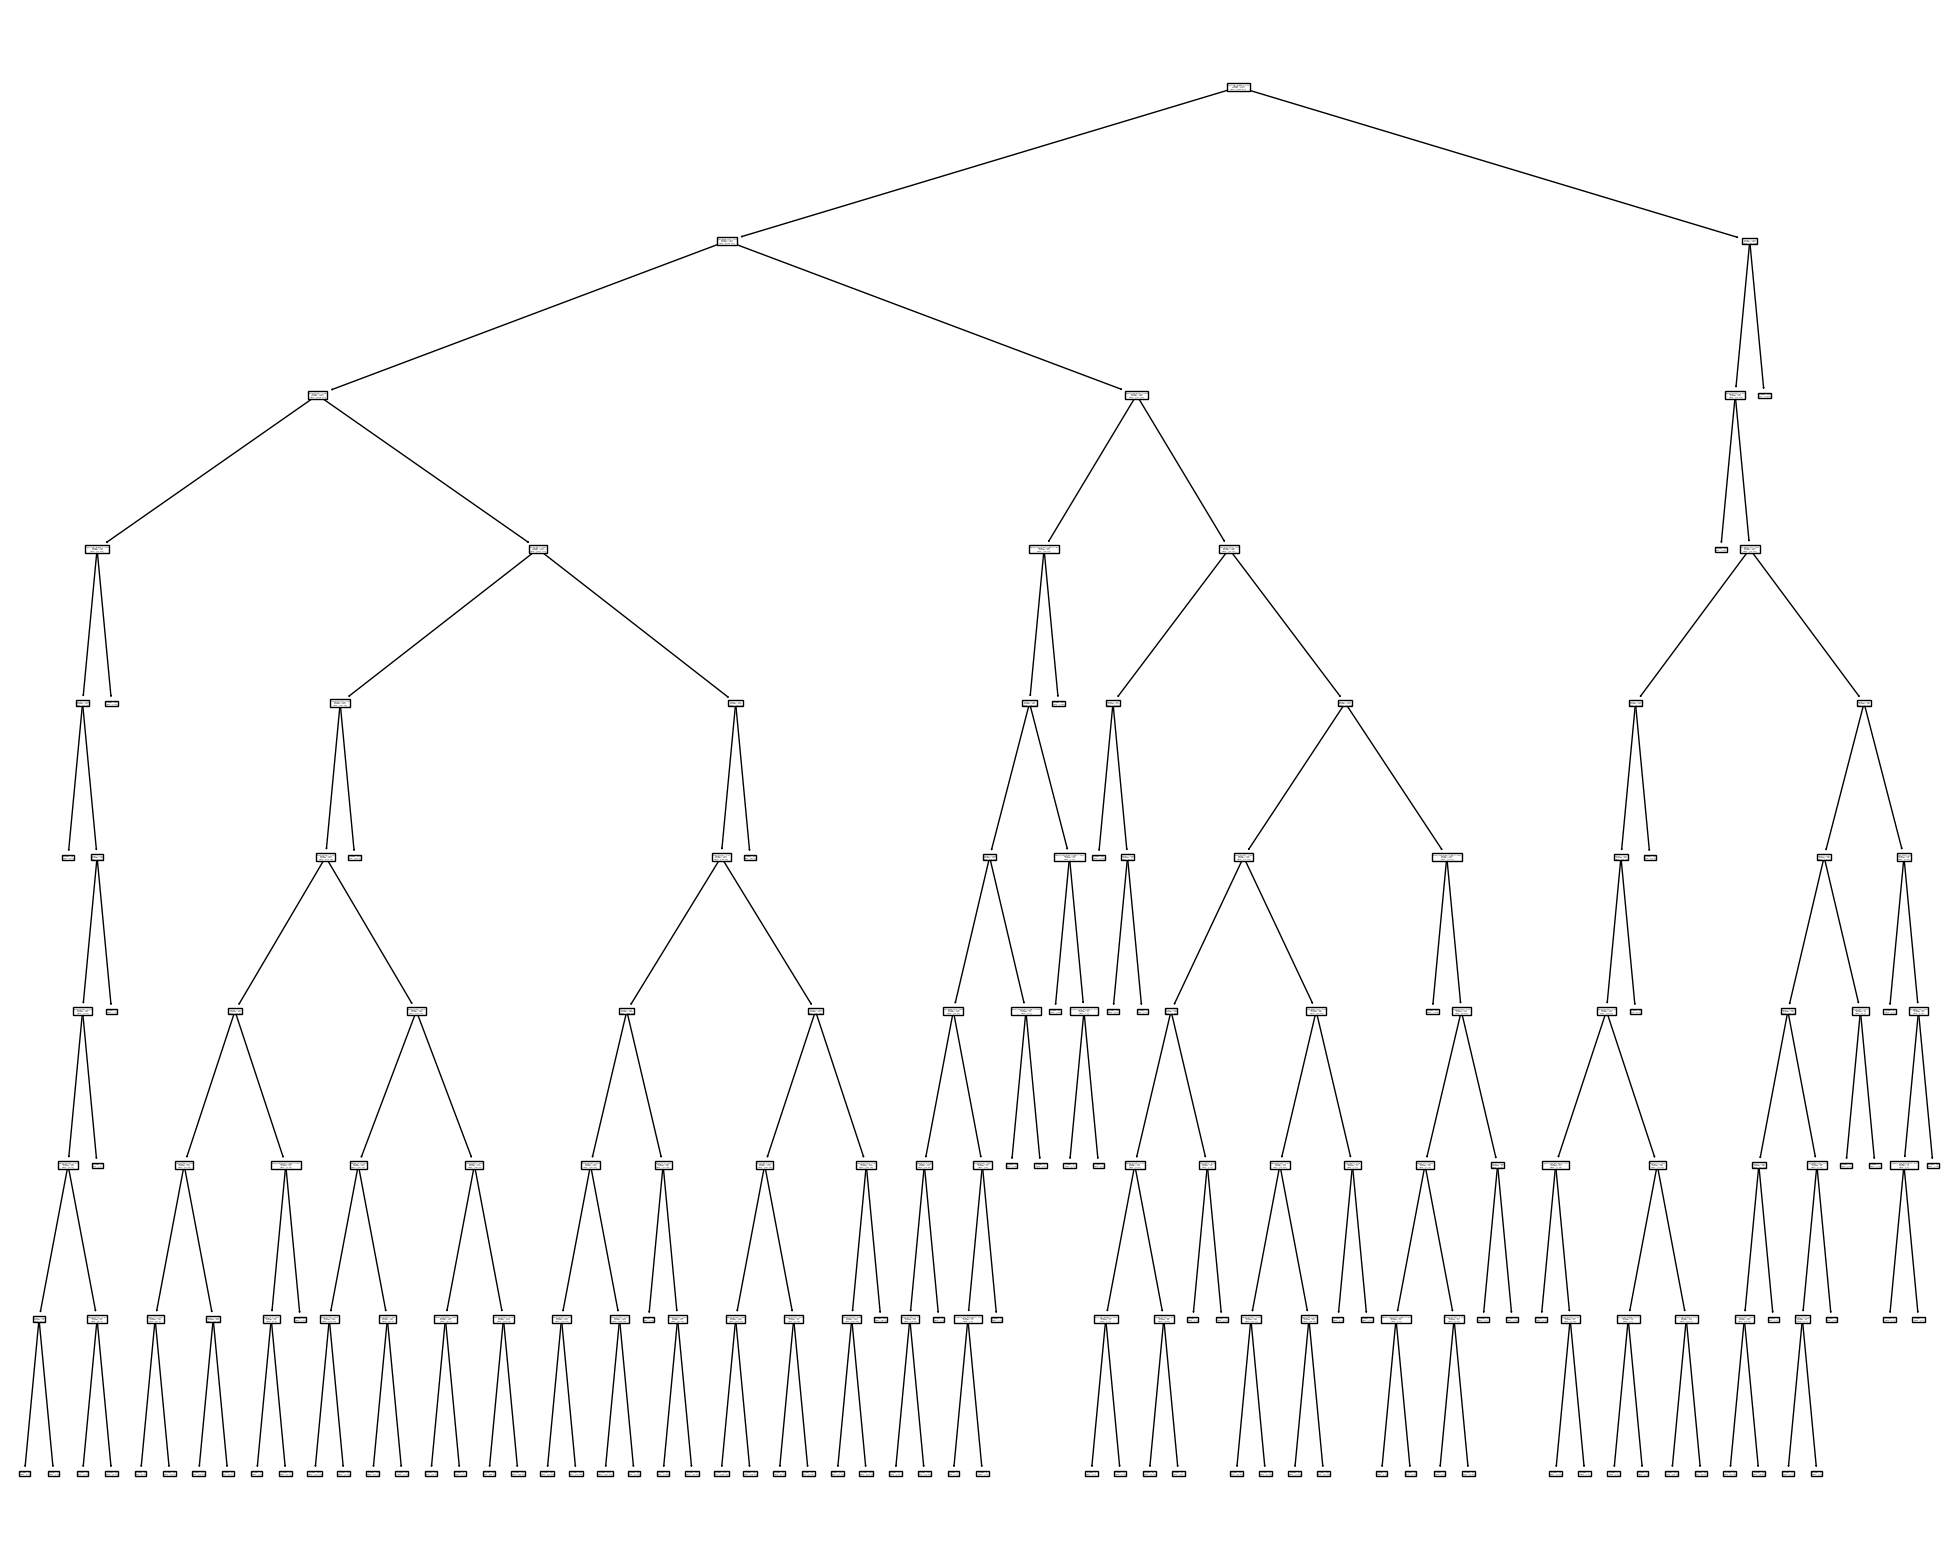

In [298]:
fig = plt.figure(figsize=(25,20))
from sklearn.tree import plot_tree
fig = plot_tree(grid_result.best_estimator_, feature_names=features.keys())

##Decision Tree without resampling and pca

In [299]:
grid_result = DT(x_train_pca, y_train)

In [300]:
results(grid_result)

Best: 0.894252 using {'max_depth': 9, 'min_samples_split': 10}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 4}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 10}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 20}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 4}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 10}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 20}
0.876174 (0.005875) with: {'max_depth': 5, 'min_samples_split': 4}
0.876174 (0.005883) with: {'max_depth': 5, 'min_samples_split': 10}
0.876127 (0.005920) with: {'max_depth': 5, 'min_samples_split': 20}
0.885377 (0.007397) with: {'max_depth': 6, 'min_samples_split': 4}
0.885283 (0.007879) with: {'max_depth': 6, 'min_samples_split': 10}
0.885236 (0.007583) with: {'max_depth': 6, 'min_samples_split': 20}
0.888054 (0.005921) with: {'max_depth': 7, 'min_samples_split': 4}
0.888148 (0.005443) with: {'max_depth': 7, 'min_samples_sp

In [301]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", DTresult['DT2'])

Analysis of the Algorithm:

[[3830  401]
 [ 919  174]]
[[3830  401]
 [ 919  174]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.85      4231
           1       0.30      0.16      0.21      1093

    accuracy                           0.75      5324
   macro avg       0.55      0.53      0.53      5324
weighted avg       0.70      0.75      0.72      5324

Accuracy: 0.7520661157024794
Precision: 0.7030412802453182
Recall: 0.7520661157024794
F1 Score: 0.720718865648154
Class 1 recall score on test data: 0.15919487648673375


In [302]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.643270944741533


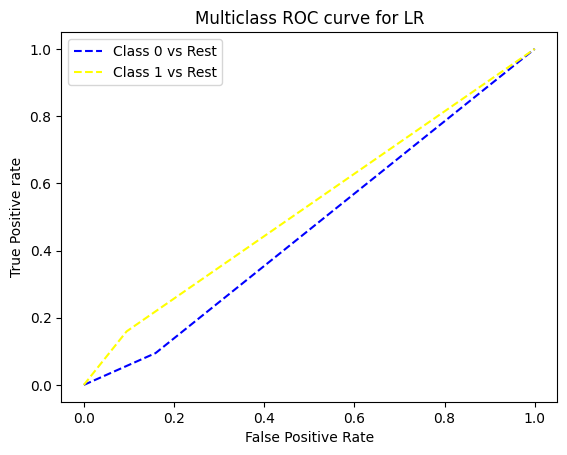

In [303]:
roc(y_test, y_prediction)

##Decision Tree with undersampling

In [304]:
grid_result = DT(x_train_dres, y_train_dres)

In [305]:
results(grid_result)

Best: 0.915083 using {'max_depth': 9, 'min_samples_split': 10}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 4}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 10}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 20}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 4}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 10}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 20}
0.901494 (0.004802) with: {'max_depth': 5, 'min_samples_split': 4}
0.901494 (0.004802) with: {'max_depth': 5, 'min_samples_split': 10}
0.901359 (0.004969) with: {'max_depth': 5, 'min_samples_split': 20}
0.905550 (0.004895) with: {'max_depth': 6, 'min_samples_split': 4}
0.905483 (0.005001) with: {'max_depth': 6, 'min_samples_split': 10}
0.905280 (0.005041) with: {'max_depth': 6, 'min_samples_split': 20}
0.912446 (0.005469) with: {'max_depth': 7, 'min_samples_split': 4}
0.912379 (0.005378) with: {'max_depth': 7, 'min_samples_sp

In [306]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',DTresult['DT3'])

Analysis of the Algorithm:

[[3938  293]
 [ 275  818]]
[[3938  293]
 [ 275  818]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4231
           1       0.74      0.75      0.74      1093

    accuracy                           0.89      5324
   macro avg       0.84      0.84      0.84      5324
weighted avg       0.89      0.89      0.89      5324

Accuracy: 0.8933132982719759
Precision: 0.8939842486817472
Recall: 0.8933132982719759
F1 Score: 0.8936352402241782
testing recall Score: 0.7483989021043


In [307]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7731729055258467


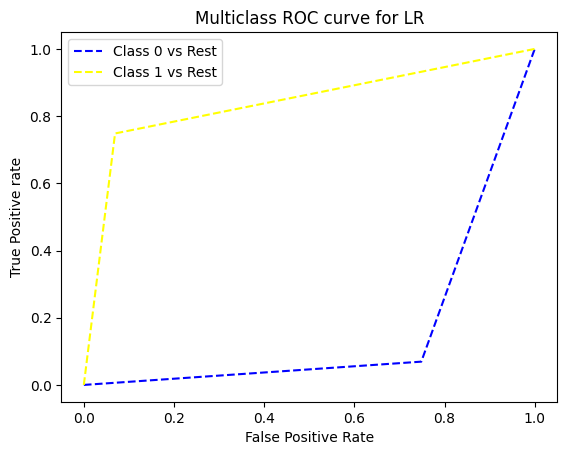

In [308]:
roc(y_test, y_prediction)

##Decision Tree with undersampling and pca

In [309]:
grid_result = DT(x_train_downsampled_pca, y_train_dres)

In [310]:
results(grid_result)

Best: 0.884186 using {'max_depth': 9, 'min_samples_split': 4}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 4}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 10}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 20}
0.861943 (0.003829) with: {'max_depth': 4, 'min_samples_split': 4}
0.862011 (0.003922) with: {'max_depth': 4, 'min_samples_split': 10}
0.862011 (0.003922) with: {'max_depth': 4, 'min_samples_split': 20}
0.867081 (0.005146) with: {'max_depth': 5, 'min_samples_split': 4}
0.867149 (0.005136) with: {'max_depth': 5, 'min_samples_split': 10}
0.867013 (0.005053) with: {'max_depth': 5, 'min_samples_split': 20}
0.871138 (0.003384) with: {'max_depth': 6, 'min_samples_split': 4}
0.871070 (0.003433) with: {'max_depth': 6, 'min_samples_split': 10}
0.870800 (0.003857) with: {'max_depth': 6, 'min_samples_split': 20}
0.878981 (0.005881) with: {'max_depth': 7, 'min_samples_split': 4}
0.878508 (0.005718) with: {'max_depth': 7, 'min_samples_spl

In [311]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',DTresult['DT4'])

Analysis of the Algorithm:

[[3802  429]
 [ 310  783]]
[[3802  429]
 [ 310  783]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4231
           1       0.65      0.72      0.68      1093

    accuracy                           0.86      5324
   macro avg       0.79      0.81      0.80      5324
weighted avg       0.87      0.86      0.86      5324

Accuracy: 0.8611945905334335
Precision: 0.8674211088705424
Recall: 0.8611945905334335
F1 Score: 0.8637877145812276
testing class 1 recall Score: 0.716376944190302


In [312]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.7589126559714795


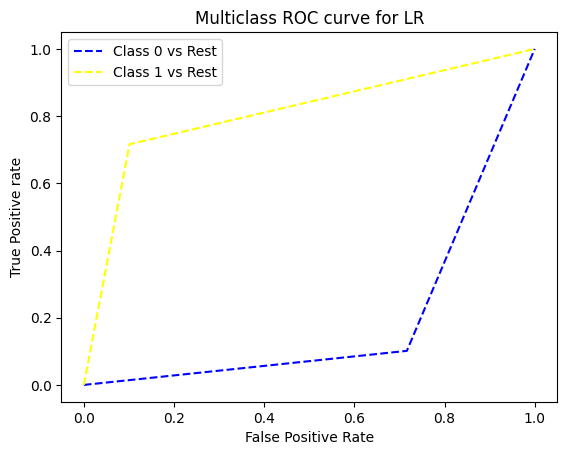

In [313]:
roc(y_test, y_prediction)

##Decision Tree with upsampling

In [314]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="gini")
  max_depth = [3, 4, 5, 6, 7, 8, 9, 10, 11]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [315]:
grid_result = DT(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [316]:
results(grid_result)

Best: 0.871966 using {'max_depth': 11, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 10}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 20}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 4}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 10}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 20}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 4}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 10}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 20}
0.847275 (0.005494) with: {'max_depth': 6, 'min_samples_split': 4}
0.847305 (0.005504) with: {'max_depth': 6, 'min_samples_split': 10}
0.847275 (0.005492) with: {'max_depth': 6, 'min_samples_split': 20}
0.853820 (0.004007) with: {'max_depth': 7, 'min_samples_split': 4}
0.853850 (0.004036) with: {'max_depth': 7, 'min_samples_sp

In [317]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT5'])

Analysis of the Algorithm:

[[4077  154]
 [ 286  807]]
[[4077  154]
 [ 286  807]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4231
           1       0.84      0.74      0.79      1093

    accuracy                           0.92      5324
   macro avg       0.89      0.85      0.87      5324
weighted avg       0.92      0.92      0.92      5324

Accuracy: 0.9173553719008265
Precision: 0.9150074748685827
Recall: 0.9173553719008265
F1 Score: 0.9153344919050272
Class 1 recall score for test data: 0.7383348581884721


In [318]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.8014635887672537


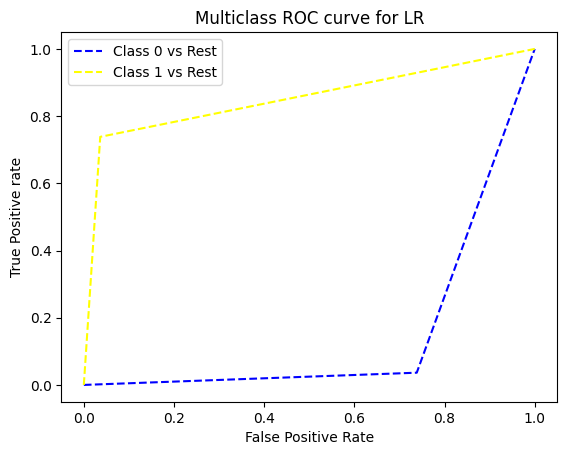

In [319]:
roc(y_test, y_prediction)

##Decision Tree with upsampling and pca

In [320]:
grid_result = DT(X_train_upsampled_pca, y_train_ures_SMOTE)

In [321]:
results(grid_result)

Best: 0.840939 using {'max_depth': 11, 'min_samples_split': 4}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 4}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 10}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 20}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 4}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 10}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 20}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 4}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 10}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 20}
0.805212 (0.003966) with: {'max_depth': 6, 'min_samples_split': 4}
0.805152 (0.004062) with: {'max_depth': 6, 'min_samples_split': 10}
0.805123 (0.004274) with: {'max_depth': 6, 'min_samples_split': 20}
0.813660 (0.002776) with: {'max_depth': 7, 'min_samples_split': 4}
0.813571 (0.002905) with: {'max_depth': 7, 'min_samples_sp

In [322]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT6'])

Analysis of the Algorithm:

[[3894  337]
 [ 347  746]]
[[3894  337]
 [ 347  746]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4231
           1       0.69      0.68      0.69      1093

    accuracy                           0.87      5324
   macro avg       0.80      0.80      0.80      5324
weighted avg       0.87      0.87      0.87      5324

Accuracy: 0.8715251690458302
Precision: 0.8710943795208144
Recall: 0.8715251690458302
F1 Score: 0.871305783535514
Class 1 recall score for test data: 0.6825251601097896


In [323]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.8088410280818658


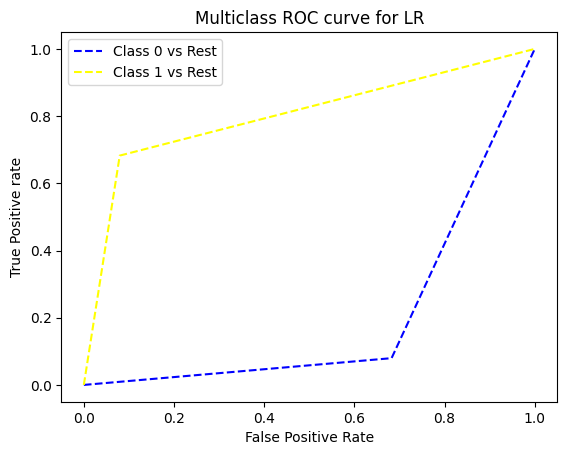

In [324]:
roc(y_test, y_prediction)

##Decision Tree with selected Features

In [325]:
grid_result = DT(featureSelectedTrain, y_train)

In [326]:
results(grid_result)

Best: 0.928484 using {'max_depth': 8, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 10}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 20}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 4}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 10}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 20}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 4}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 10}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 20}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 4}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 10}
0.925807 (0.006188) with: {'max_depth': 6, 'min_samples_split': 20}
0.926512 (0.005866) with: {'max_depth': 7, 'min_samples_split': 4}
0.926653 (0.005850) with: {'max_depth': 7, 'min_samples_spl

In [327]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
DTresult['DT7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT7'])

Analysis of the Algorithm:

[[4213   18]
 [ 327  766]]
[[4213   18]
 [ 327  766]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4231
           1       0.98      0.70      0.82      1093

    accuracy                           0.94      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.94      0.93      5324

Accuracy: 0.9351990984222389
Precision: 0.9380469157862095
Recall: 0.9351990984222389
F1 Score: 0.9310066529048477
testing recall Score for class1: 0.7008234217749314


In [328]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.696301247771836


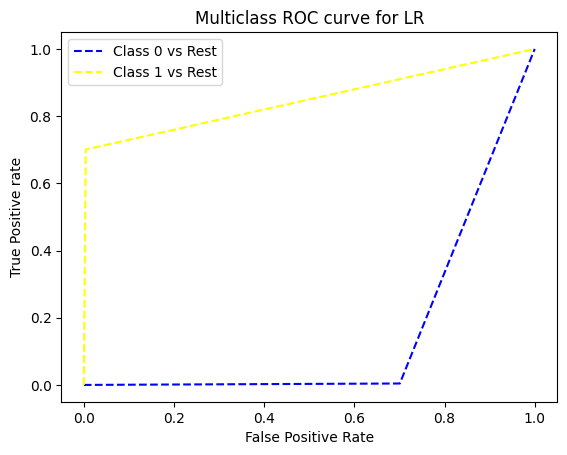

In [329]:
roc(y_test, y_prediction)

##Decision Tree Comparision

In [330]:
DTresult

{'DT1': 0.7008234217749314,
 'DT2': 0.15919487648673375,
 'DT3': 0.7483989021043,
 'DT4': 0.716376944190302,
 'DT5': 0.7383348581884721,
 'DT6': 0.6825251601097896,
 'DT7': 0.7008234217749314}

In [331]:
resultDic['Decision Tree'] = 0.7465690759377859#DT3, {'max_depth': 9, 'min_samples_split': 20}